Autor: Veronika Verbirsová<br>
Vypracováno: 17.03.2022

<img src="boardgames.png" alt="Board games" width="300" align="center"/>

### <center>Základní analýza, množství vydaných her (vývoj v čase), nejoblíbenější hry podle kategorií</center>

Datový soubor obsahující atributy a hodnocení pro přibližně 94 000 deskových her a rozšíření, jak je lze získat z  https://boardgamegeek.com/

Zdroj dat: https://www.kaggle.com/gabrio/board-games-dataset<br>
Licence: The MIT License (MIT), Copyright (c) 2015 Gabriele Baldassarre<br>
Soubor: database.sqlite(tabulky: BoardGames, bgg.ldaOut.topics) 147.06 MB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# načtení databáze
import sqlite3
conn = sqlite3.connect('database.sqlite')
query = 'SELECT * FROM BoardGames'
data = pd.read_sql_query(query, conn)
conn.close()

## Info a první řádky tabulky

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 81 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   row_names                                 90400 non-null  object 
 1   game.id                                   90400 non-null  object 
 2   game.type                                 90400 non-null  object 
 3   details.description                       90400 non-null  object 
 4   details.image                             83508 non-null  object 
 5   details.maxplayers                        90397 non-null  float64
 6   details.maxplaytime                       90397 non-null  float64
 7   details.minage                            90397 non-null  float64
 8   details.minplayers                        90397 non-null  float64
 9   details.minplaytime                       90397 non-null  float64
 10  details.name                      

In [3]:
pd.set_option('display.max_columns', 81)
data.head()

,row_names,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,details.name,details.playingtime,details.thumbnail,details.yearpublished,attributes.boardgameartist,attributes.boardgamecategory,attributes.boardgamecompilation,attributes.boardgamedesigner,attributes.boardgameexpansion,attributes.boardgamefamily,attributes.boardgameimplementation,attributes.boardgameintegration,attributes.boardgamemechanic,attributes.boardgamepublisher,attributes.total,stats.average,stats.averageweight,stats.bayesaverage,stats.family.abstracts.bayesaverage,stats.family.abstracts.pos,stats.family.cgs.bayesaverage,stats.family.cgs.pos,stats.family.childrensgames.bayesaverage,stats.family.childrensgames.pos,stats.family.familygames.bayesaverage,stats.family.familygames.pos,stats.family.partygames.bayesaverage,stats.family.partygames.pos,stats.family.strategygames.bayesaverage,stats.family.strategygames.pos,stats.family.thematic.bayesaverage,stats.family.thematic.pos,stats.family.wargames.bayesaverage,stats.family.wargames.pos,stats.median,stats.numcomments,stats.numweights,stats.owned,stats.stddev,stats.subtype.boardgame.bayesaverage,stats.subtype.boardgame.pos,stats.trading,stats.usersrated,stats.wanting,stats.wishing,polls.language_dependence,polls.suggested_numplayers.1,polls.suggested_numplayers.10,polls.suggested_numplayers.2,polls.suggested_numplayers.3,polls.suggested_numplayers.4,polls.suggested_numplayers.5,polls.suggested_numplayers.6,polls.suggested_numplayers.7,polls.suggested_numplayers.8,polls.suggested_numplayers.9,polls.suggested_numplayers.Over,polls.suggested_playerage,attributes.t.links.concat.2....,stats.family.amiga.bayesaverage,stats.family.amiga.pos,stats.family.arcade.bayesaverage,stats.family.arcade.pos,stats.family.atarist.bayesaverage,stats.family.atarist.pos,stats.family.commodore64.bayesaverage,stats.family.commodore64.pos,stats.subtype.rpgitem.bayesaverage,stats.subtype.rpgitem.pos,stats.subtype.videogame.bayesaverage,stats.subtype.videogame.pos
0,1,1,boardgame,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5.0,240.0,14.0,3.0,240.0,Die Macher,240.0,//cf.geekdo-images.com/images/pic159509_t.jpg,1986.0,Marcus Gschwendtner,"Economic,Negotiation,Political",None,Karl-Heinz Schmiel,None,"Country: Germany,Valley Games Classic Line",None,None,"Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",6.0,7.66508,4.3477,7.29168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.39570,85.0,NaN,NaN,NaN,NaN,0.0,1763.0,719.0,5251.0,1.59321,7.29168,147.0,170.0,4498.0,505.0,1654.0,No,NotRecommended,None,NotRecommended,NotRecommended,Recommended,Best,None,None,None,None,NotRecommended,14,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,boardgame,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4.0,30.0,12.0,3.0,30.0,Dragonmaster,30.0,//cf.geekdo-images.com/images/pic184174_t.jpg,1981.0,Bob Pepper,"Card Game,Fantasy",None,"G. W. ""Jerry"" D'Arcey",None,Animals: Dragons,"Indulgence,Coup d'etat",None,Trick-taking,"E.S. Lowe,Milton Bradley",7.0,6.60815,1.9423,5.87150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.91318,1066.0,NaN,NaN,NaN,NaN,0.0,273.0,52.0,1053.0,1.46282,5.87150,2541.0,73.0,478.0,67.0,161.0,Some,NotRecommended,None,NotRecommended,Recommended,Best,None,None,None,None,None,NotRecommended,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,boardgame,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4.0,60.0,10.0,2.0,30.0,Samurai,60.0,//cf.geekdo-images.com/images/pic3211873_t.jpg,1998.0,Franz Vohwinkel,"Abstract Strategy,Medieval",None,Reiner Knizia,None,"Asian Theme,Country: Japan,Knizia tile-laying ...",None,None,"Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",6.0,7.44119,2.5085,7.28295,NaN

## Čištění a příprava dat

In [4]:
# V tabulce si ponecháme jen základní atributy
data = data[['game.id', 'game.type', 'details.description', 'details.maxplayers', 'details.minage', 'details.minplayers',
             'details.name', 'details.playingtime', 'details.yearpublished', 'attributes.boardgamecategory',
             'attributes.boardgamedesigner', 'attributes.boardgameexpansion', 'attributes.boardgamepublisher',
             'stats.average', 'stats.averageweight']]

# Přejmenujeme sloupce
data = data.rename(columns = {'game.id': 'id', 'game.type': 'type', 'details.description': 'description',
                              'details.maxplayers': 'maxplayers', 'details.minage': 'minage',
                              'details.minplayers': 'minplayers', 'details.name': 'name',
                              'details.playingtime': 'playingtime', 'details.yearpublished': 'yearpublished',
                              'attributes.boardgamecategory': 'category','attributes.boardgamedesigner': 'designer',
                              'attributes.boardgameexpansion': 'expansions', 'attributes.boardgamepublisher': 'publisher',
                              'stats.average': 'rating', 'stats.averageweight': 'difficulty'})

In [5]:
# Zjistíme, jaké jsou hodnoty ve sloupci s typem hry
data['type'].unique()

array(['boardgame', 'boardgameexpansion'], dtype=object)

In [6]:
# Ponecháme jen základní hry a rozšíření vynecháme
data = data[data['type'] == 'boardgame']

In [7]:
# Zjistíme chybějící hodnoty
data.isnull().sum()

id                   0
type                 0
description          0
maxplayers           3
minage               3
minplayers           3
name                 0
playingtime          3
yearpublished        3
category          1391
designer          9587
expansions       72605
publisher           95
rating               0
difficulty           0
dtype: int64

In [8]:
# Odstraníme záznamy s chybějícími hodnotami ve sloupcích max hráčů, min věk, min hráčů, hrací čas a rok vydání
data.dropna(subset=['maxplayers', 'minage', 'minplayers', 'playingtime', 'yearpublished'], inplace = True)

In [9]:
# Nyní můžeme převést číselné hodnoty těchto sloupců z float64 na int32
data = data.astype({'maxplayers': 'int32', 'minage': 'int32', 'minplayers': 'int32',
                    'playingtime': 'int32', 'yearpublished': 'int32'})

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76685 entries, 0 to 90399
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             76685 non-null  object 
 1   type           76685 non-null  object 
 2   description    76685 non-null  object 
 3   maxplayers     76685 non-null  int32  
 4   minage         76685 non-null  int32  
 5   minplayers     76685 non-null  int32  
 6   name           76685 non-null  object 
 7   playingtime    76685 non-null  int32  
 8   yearpublished  76685 non-null  int32  
 9   category       75294 non-null  object 
 10  designer       67098 non-null  object 
 11  expansions     4083 non-null   object 
 12  publisher      76590 non-null  object 
 13  rating         76685 non-null  float64
 14  difficulty     76685 non-null  float64
dtypes: float64(2), int32(5), object(8)
memory usage: 7.9+ MB


## Základní analýza

In [11]:
data.describe()

,maxplayers,minage,minplayers,playingtime,yearpublished,rating,difficulty
count,76685.000000,76685.000000,76685.000000,76685.000000,76685.000000,76685.000000,76685.000000
mean,5.647467,6.805607,2.007994,49.104153,1789.260220,3.981756,0.798242
std,57.767585,4.921399,0.868485,351.301987,611.127654,2.874972,1.087124
min,0.000000,0.000000,0.000000,0.000000,-3500.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,5.000000,1982.000000,0.000000,0.000000
50%,4.000000,8.000000,2.000000,30.000000,2003.000000,5.000000,0.000000
75%,6.000000,10.000000,2.000000,60.000000,2011.000000,6.308330,1.500000
max,11299.000000,99.000000,50.000000,60120.000000,2019.000000,10.000000,5.000000


### První čtyři sloupce obsahují odlehlé hodnoty, takže si zobrazíme rozložení dat

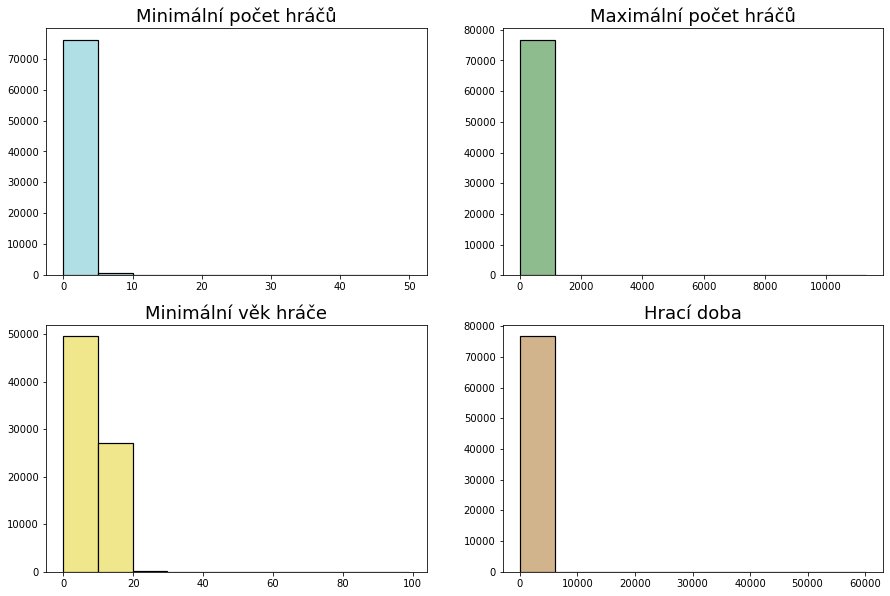

In [12]:
# Vytvoříme histogramy
plt.figure(figsize=(15, 10))

# Minimální počet hráčů
plt.subplot(2,2,1)
data['minplayers'].plot(kind = 'hist', edgecolor = 'black', linewidth = 1.2, color = ['powderblue'])
plt.title('Minimální počet hráčů', fontsize = 18)
plt.ylabel('')

# Maximální počet hráčů
plt.subplot(2,2,2)
data['maxplayers'].plot(kind = 'hist', edgecolor = 'black', linewidth = 1.2, color = ['darkseagreen'])
plt.title('Maximální počet hráčů', fontsize = 18)
plt.ylabel('')

# Minimální věk hráče
plt.subplot(2,2,3)
data['minage'].plot(kind = 'hist', edgecolor = 'black', linewidth = 1.2, color = ['khaki'])
plt.title('Minimální věk hráče', fontsize = 18)
plt.ylabel('')

# Hrací doba
plt.subplot(2,2,4)
data['playingtime'].plot(kind = 'hist', edgecolor = 'black', linewidth = 1.2, color = ['tan'])
plt.title('Hrací doba', fontsize = 18)
plt.ylabel('');

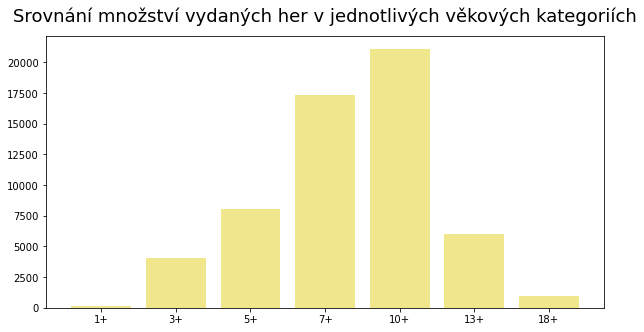

In [13]:
# Zjistíme kolik her bylo vydáno pro jednotlivé věkové kategorie 1+, 3+, 5+, 7+, 10+, 13+, 18+
plus1 = data['id'][(data['minage'] == 1) | (data['minage'] == 2)].count()
plus3 = data['id'][(data['minage'] == 3) | (data['minage'] == 4)].count()
plus5 = data['id'][(data['minage'] == 5) | (data['minage'] == 6)].count()
plus7 = data['id'][(data['minage'] >= 7) & (data['minage'] < 10)].count()
plus10 = data['id'][(data['minage'] >= 10) & (data['minage'] < 13)].count()
plus13 = data['id'][(data['minage'] >= 13) & (data['minage'] <= 18)].count()
plus18 = data['id'][data['minage'] >= 18].count()

# Věkové kategorie zobrazíme v grafu
ageCat = ['1+', '3+', '5+', '7+', '10+', '13+', '18+']
values = [plus1, plus3, plus5, plus7, plus10, plus13, plus18]
plt.figure(figsize=(10,5))
plt.bar(ageCat, values, color='khaki')
plt.title('Srovnání množství vydaných her v jednotlivých věkových kategoriích', fontsize = 18, pad = 15, loc = 'center');

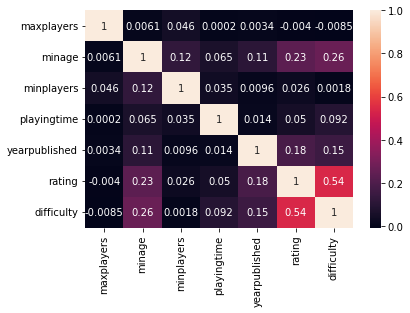

In [14]:
# Zobrazíme mapu korelací
corr = data.corr()
sns.heatmap(corr, annot=True);

### Vidíme středně silnou pozitivní korelaci mezi obtížností (komplexností) hry a jejím hodnocením

## Analýza podle roku vydání

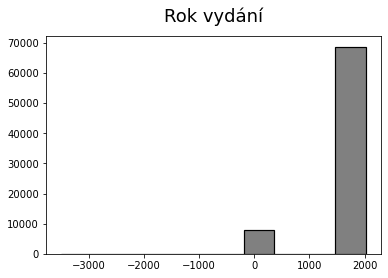

In [15]:
# Zobrazíme histogram pro rok vydání
data['yearpublished'].plot(kind = 'hist', edgecolor = 'black', linewidth = 1.2, color = ['gray'])
plt.title('Rok vydání', fontsize = 18, pad = 15)
plt.ylabel('');

### Vypadá to, že máme velké množství her s vydáním v roce 0

In [16]:
# Zjistíme kolikrát byla pro rok vydání zadána hodnota 0
data['id'][data['yearpublished'] == 0].count()

7897

### Pravděpodobně byla tato hodnota zadána, pokud se přibližný rok nedal určit. Nás ale bude zajímat vývoj za poslední století.

In [17]:
# Zkopírujeme tabulku s daty a odstraníme záznamy, kde je hodnota pro rok vydání menší než 1915 nebo větší než 2015 
year_data = data.copy(deep=True)
year_data.drop(year_data[(year_data['yearpublished'] < 1915) | (year_data['yearpublished'] > 2015)].index, inplace=True)

In [18]:
# Stávající počet záznamů
year_data.shape[0]

62299

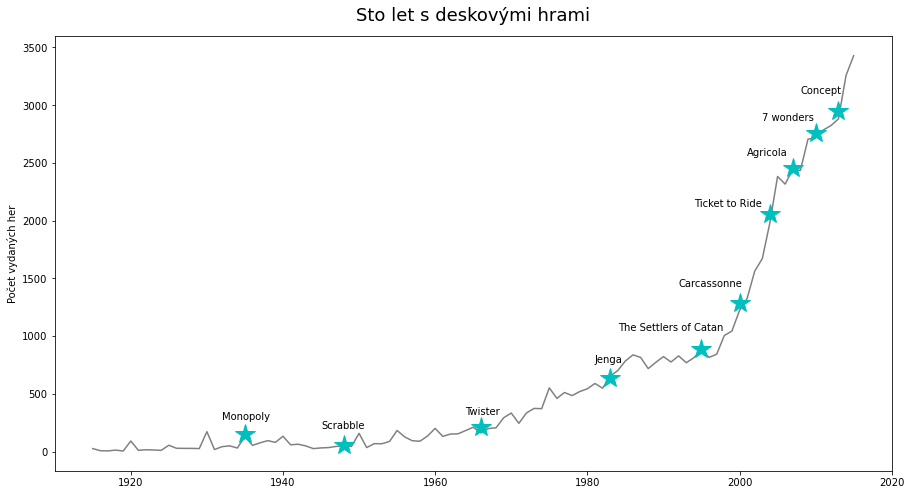

In [19]:
# Zjistíme kolik her bylo vydáno v letech 1915 - 2015
gamesPY = year_data.groupby(['yearpublished']).size()
years = year_data.groupby('yearpublished')['yearpublished'].unique()

# Vykreslíme graf
plt.figure(figsize=(15, 8))
plt.plot(years, gamesPY, 'gray')
plt.title('Sto let s deskovými hrami', fontsize = 18, pad = 15)
plt.ylabel('Počet vydaných her')

# Zobrazíme body pro vybrané hry
plt.plot(1935, 150, "c*", markersize = 20)
plt.annotate(text = 'Monopoly',  xy = [1932, 280])
plt.plot(1948, 55, "c*", markersize = 20)
plt.annotate(text = 'Scrabble',  xy = [1945, 200])
plt.plot(1966, 210, "c*", markersize = 20)
plt.annotate(text = 'Twister',  xy = [1964, 322])
plt.plot(1983, 640, "c*", markersize = 20)
plt.annotate(text = 'Jenga',  xy = [1981, 770])
plt.plot(1995, 885, "c*", markersize = 20)
plt.annotate(text = 'The Settlers of Catan',  xy = [1984, 1045])
plt.plot(2000, 1290, "c*", markersize = 20)
plt.annotate(text = 'Agricola',  xy = [2001, 2560])
plt.plot(2004, 2060, "c*", markersize = 20)
plt.annotate(text = 'Carcassonne',  xy = [1992, 1425])
plt.plot(2007, 2460, "c*", markersize = 20)
plt.annotate(text = 'Ticket to Ride',  xy = [1994, 2120])
plt.plot(2010, 2760, "c*", markersize = 20)
plt.annotate(text = '7 wonders',  xy = [2003, 2870])
plt.plot(2013, 2950, "c*", markersize = 20)
plt.annotate(text = 'Concept',  xy = [2008, 3100]);


In [20]:
gamesPY

yearpublished
1915      26
1916       8
1917       6
1918      13
1919       5
        ... 
2011    2785
2012    2823
2013    2881
2014    3258
2015    3429
Length: 101, dtype: int64

### Na začátku 20. století vycházely jednotky až desítky her, v roce 2015 už to bylo téměř tři a půl tisíce her.

## Nejoblíbenější hry podle kategorií

In [21]:
# Doplníme chybějící hodnoty v kategorii na neznámá
data['category'] = data['category'].fillna('Unknow')

# Rozdělíme kategorie jednotlivých her pomocí oddělovače
data_categories = data['category'].apply(lambda x: pd.Series(x.split(',')))

# Zjistíme, kolik se vytvořilo sloupců, tedy maximální počet uvedených kategorií u jedné hry
data_categories.shape[1]

28

In [22]:
# Vytvoříme seznam jednotlivých kategorií
categories = []
for i in range(28):
    cat = data_categories[i].dropna().unique()
    for c in cat:
        if c not in categories:
            categories.append(c)
print(categories)

['Economic', 'Card Game', 'Abstract Strategy', 'Ancient', 'Civilization', 'Exploration', 'Fantasy', 'Negotiation', 'Bluffing', 'Collectible Components', 'Miniatures', 'American West', 'Science Fiction', 'Adventure', 'Fighting', 'Deduction', 'Dice', 'Aviation / Flight', 'Renaissance', 'City Building', 'Medieval', 'Trivia', 'Political', 'Wargame', 'American Civil War', 'Age of Reason', 'Animals', 'Nautical', 'Territory Building', 'Prehistoric', 'Electronic', 'Action / Dexterity', 'Educational', 'Racing', 'Print & Play', 'Trains', 'Party Game', 'Civil War', 'American Indian Wars', 'Napoleonic', 'Humor', 'Movies / TV / Radio theme', 'American Revolutionary War', 'Mafia', 'Word Game', "Children's Game", 'Comic Book / Strip', 'Unknow', 'Arabian', 'Novel-based', 'Pirates', 'Horror', 'Transportation', 'Puzzle', 'Music', 'Sports', 'Real-time', 'Post-Napoleonic', 'Farming', 'Murder/Mystery', 'Memory', 'Mythology', 'Book', 'Maze', 'Medical', 'Expansion for Base-game', 'Modern Warfare', 'Environme

### V tomto kompletním seznamu kategorií vidíme kromě obecné kategorie 'Wargame' i kategorie pro konkrétní válečná období, tyto tedy ze seznamu vyřadíme. Dále vyřadíme kategorie, které poukazují spíše na technické provedení hry (karetní, kostkové, figurkové, ...). Na tyto se ještě podíváme později a zde ponecháme jen herní témata.

In [23]:
# Odstraníme kategorie konkrétních válek
wars = ['American Civil War', 'Civil War', 'American Indian Wars', 'Napoleonic', 'American Revolutionary War',
            'Post-Napoleonic','Modern Warfare', 'Pike and Shot', 'World War II', 'Korean War', 'Vietnam War', 'World War I']
for w in wars:
    categories.remove(w)

# Odstraníme kategorie s provedením hry  
design = ['Card Game', 'Miniatures', 'Dice', 'Electronic', 'Print & Play', 'Book']    
for d in design:
    categories.remove(d)  
    
# Odstraníme kategorii neznámá
categories.remove('Unknow')

In [24]:
# Vytvoříme tabulku s populárními hrami (hodnocení alespoň 8)
popular = data[data['rating'] >= 8]
popular.shape[0]

1710

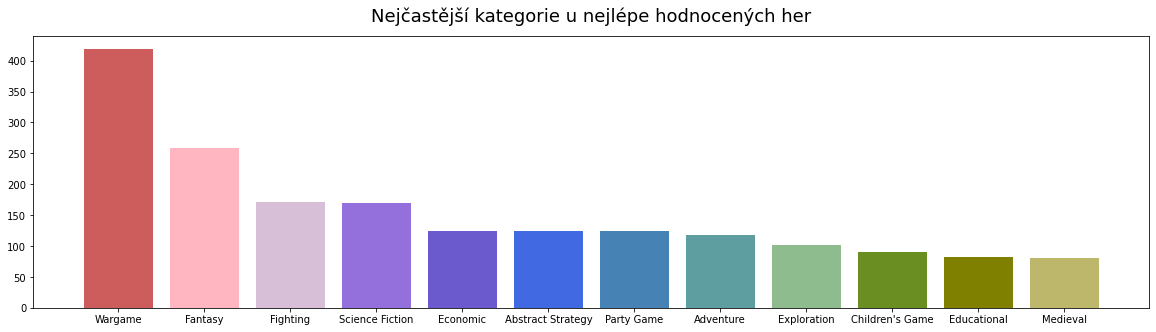

In [25]:
# Zjistíme kolikrát se dané kategorie v tabulce populárních her vyskytují
popCat = pd.DataFrame(columns = ['Category', 'Count'])
count = 0
row = 0
for name in categories:
    for cat in popular['category']:
        if name in cat:
            count += 1
        row += 1
    popCat.loc[row] = [name, count]
    count = 0

# Kategorie seřadíme od nejčastěji se vyskytujících
popCat = popCat.sort_values('Count', ascending = False)

# Zobrazíme graf pro prvních 12 kategorií
plt.figure(figsize=(20,5))
plt.bar(popCat['Category'].head(12),popCat['Count'].head(12), color=['indianred', 'lightpink', 'thistle','mediumpurple',
                                                                     'slateblue', 'royalblue', 'steelblue', 'cadetblue',
                                                                     'darkseagreen', 'olivedrab', 'olive', 'darkkhaki'])
plt.title('Nejčastější kategorie u nejlépe hodnocených her', fontsize = 18, pad = 15, loc = 'center');


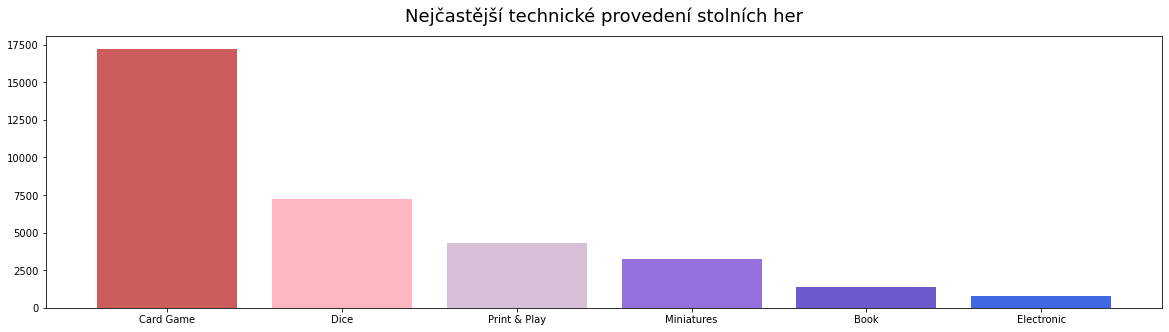

In [26]:
# Kategorie s technickým provedením hry

# Zjistíme kolikrát se daná kategorie mezi hrami vyskytuje
gameD = pd.DataFrame(columns = ['Category', 'Count'])
count = 0
row = 0
for d in design:
    for cat in data['category']:
        if d in cat:
            count += 1
        row += 1
    gameD.loc[row] = [d, count]
    count = 0

# Kategorie seřadíme od nejčastěji se vyskytujících
gameD = gameD.sort_values('Count', ascending = False)

# Zobrazíme graf
plt.figure(figsize=(20,5))
plt.bar(gameD['Category'], gameD['Count'], color=['indianred', 'lightpink', 'thistle',
                                                  'mediumpurple','slateblue', 'royalblue'])
plt.title('Nejčastější technické provedení stolních her', fontsize = 18, pad = 15, loc = 'center');


### Tedy nejčastější stolní hrou je karetní hra. A nejoblíbenějším herním tématem je válka. A moje nejoblíbenější hra?

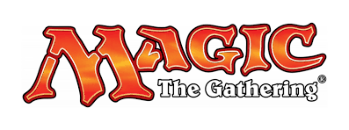

Board game name: Magic: The Gathering
Year published: 1993
Designer: Richard Garfield
Publisher: Wizards of the Coast
Rating: 7.43768
Difficulty: 3.1448
Min age: 13
Playing time: 20 minutes
Category: Card Game,Collectible Components,Fantasy,Fighting
-----------------------------------------------------------
Description: From the official website:  In the Magic game, you play the role of a planeswalker-a powerful wizard who fights other planeswalkers for glory, knowledge, and conquest. Your deck of cards represents all the weapons in your arsenal. It contains the spells you know and the creatures you can summon to fight for you.This is the grandfather of the collectible card game (or CCG) genre.  Cards are categorized as common, uncommon, rare, and mythic rare.  Players collect cards and build decks out of their collection.Players build a deck of cards and duel against an opponent's deck.  The first player to reduce his opponent to 0 life (or meet another set win condition) wins the ga

In [27]:
mtg = data[data['name'] == 'Magic: The Gathering'].copy(deep=True)

# Obrázek
mtgImage = plt.imread("mtg.png")
plt.axis("off")
plt.imshow(mtgImage)
plt.show()

# Upravení popisu hry
x = mtg.iloc[0]['description']
x = x.replace('&#10;', '')
x = x.replace('&mdash;', '-')
x = x.replace('&quot;', '')

# Atributy a popis hry
print("Board game name: {name}\nYear published: {year}\nDesigner: {designer}\nPublisher: {publisher}\nRating: {rating}\nDifficulty: {difficulty}\nMin age: {minage}\nPlaying time: {playingtime} minutes\nCategory: {category}\n-----------------------------------------------------------\nDescription: {description}"
      .format(name = mtg.iloc[0]['name'], year = mtg.iloc[0]['yearpublished'], designer = mtg.iloc[0]['designer'],
              publisher = mtg.iloc[0]['publisher'], rating = mtg.iloc[0]['rating'], difficulty = mtg.iloc[0]['difficulty'],
              minage = mtg.iloc[0]['minage'], playingtime = mtg.iloc[0]['playingtime'], category = mtg.iloc[0]['category'],
              description = x))